# Load Data

In [1]:
from google.colab import files
uploaded = files.upload()


Saving Royal_data.txt to Royal_data.txt


In [2]:
with open('Royal_data.txt', 'r') as f:
    royal_data = f.readlines()

print(royal_data)
print(type(royal_data))

['The future king is the prince\n', 'Daughter is the princess\n', 'Son is the prince\n', 'Only a man can be a king\n', 'Only a woman can be a queen\n', 'The princess will be a queen\n', 'The prince is a strong man\n', 'The princess is a beautiful woman\n', 'Prince is only a boy now\n', 'Prince will be king\n', 'A boy will be a man']
<class 'list'>


In [3]:
for line in range(len(royal_data)):
  # royal_data[line]=royal_data[line].lower().replace('\n','')
  royal_data[line]=royal_data[line].lower().strip()

print(royal_data)

['the future king is the prince', 'daughter is the princess', 'son is the prince', 'only a man can be a king', 'only a woman can be a queen', 'the princess will be a queen', 'the prince is a strong man', 'the princess is a beautiful woman', 'prince is only a boy now', 'prince will be king', 'a boy will be a man']


# Remove stop words and tokenize

In [4]:
stopwords= ['the','is','am','are','can','only','a','be','will','now']
filtered_data = []

for sent in royal_data:
  temp=[]
  for word in sent.split():
    # print(word)
    if word not in stopwords:
      temp.append(word)
  filtered_data.append(temp)

print(filtered_data)

[['future', 'king', 'prince'], ['daughter', 'princess'], ['son', 'prince'], ['man', 'king'], ['woman', 'queen'], ['princess', 'queen'], ['prince', 'strong', 'man'], ['princess', 'beautiful', 'woman'], ['prince', 'boy'], ['prince', 'king'], ['boy', 'man']]


# Creating Bigrams

In [5]:
bigrams=[]
for word_list in filtered_data:

  for i in range(len(word_list)-1): #Getting permutations of Bigram
    for j in range(i+1,len(word_list)):
      bigrams.append([word_list[i],word_list[j]])
      bigrams.append([word_list[j],word_list[i]])

print(bigrams)

[['future', 'king'], ['king', 'future'], ['future', 'prince'], ['prince', 'future'], ['king', 'prince'], ['prince', 'king'], ['daughter', 'princess'], ['princess', 'daughter'], ['son', 'prince'], ['prince', 'son'], ['man', 'king'], ['king', 'man'], ['woman', 'queen'], ['queen', 'woman'], ['princess', 'queen'], ['queen', 'princess'], ['prince', 'strong'], ['strong', 'prince'], ['prince', 'man'], ['man', 'prince'], ['strong', 'man'], ['man', 'strong'], ['princess', 'beautiful'], ['beautiful', 'princess'], ['princess', 'woman'], ['woman', 'princess'], ['beautiful', 'woman'], ['woman', 'beautiful'], ['prince', 'boy'], ['boy', 'prince'], ['prince', 'king'], ['king', 'prince'], ['boy', 'man'], ['man', 'boy']]


# Vocabulary

In [28]:
all_words = []
# appended = []

for sent in filtered_data:
  # print(sent)
  # appended.append(sent)
  all_words.extend(sent)

# print(appended)
print(all_words)
all_words=list(set(all_words)) #Converting set of unique words again into list
all_words.sort()

print(all_words)

['future', 'king', 'prince', 'daughter', 'princess', 'son', 'prince', 'man', 'king', 'woman', 'queen', 'princess', 'queen', 'prince', 'strong', 'man', 'princess', 'beautiful', 'woman', 'prince', 'boy', 'prince', 'king', 'boy', 'man']
['beautiful', 'boy', 'daughter', 'future', 'king', 'man', 'prince', 'princess', 'queen', 'son', 'strong', 'woman']


# One-hot encoding

In [7]:
words_dict= {}
counter = 0
for word in all_words:
  words_dict[word]=counter
  counter+=1

print(words_dict)

{'beautiful': 0, 'boy': 1, 'daughter': 2, 'future': 3, 'king': 4, 'man': 5, 'prince': 6, 'princess': 7, 'queen': 8, 'son': 9, 'strong': 10, 'woman': 11}


In [8]:
import numpy as np

onehot_data = np.zeros((len(all_words),len(all_words)))

for i in range(len(all_words)):
  onehot_data[i][i] = 1

print(onehot_data)

onehot_dict = {}

for i in range(len(all_words)):
  onehot_dict[all_words[i]] = onehot_data[i]
print(onehot_dict)

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]
{'beautiful': array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), 'boy': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), 'daughter': array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), 'future': array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]), 'king': array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]), 'man': array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]), 'prince': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]), 'princess': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0

In [9]:
X = []
Y = []
# print(type(X))

for bi in bigrams:
  X.append(onehot_dict[bi[0]])
  Y.append(onehot_dict[bi[1]])

X=np.array(X)
Y=np.array(Y)
# print(X)

# Model

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Input

model = Sequential()

vocal_size = len(onehot_data[0])
embed_size = 2

model.add(Input(shape=(vocal_size,)))
model.add(Dense(2, activation='linear'))
model.add(Dense(vocal_size, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer = 'adam')

In [16]:
model.fit(X, Y, epochs=1000)


Epoch 1/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 2.4823 
Epoch 2/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 2.4810
Epoch 3/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.4752
Epoch 4/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.4764
Epoch 5/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 2.4790
Epoch 6/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.4766
Epoch 7/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.4764
Epoch 8/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.4664
Epoch 9/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.4714
Epoch 10/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 2.4705
Epoch 11/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.4706
Epoch 12/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 2.4703
Epoch 13/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 2.4706
Epoch 14/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 2.4684
Epoch 15/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 2.4646
Epo

In [30]:
# weights = model.get_weights()
weights = model.get_weights()[0]
# print(weights)

word_embedding = {}

for word in all_words:
  word_embedding[word] = weights[words_dict[word]]

print(word_embedding)

{'beautiful': array([0.5395812 , 0.49620095], dtype=float32), 'boy': array([ 1.311003  , -0.33031264], dtype=float32), 'daughter': array([0.15253487, 0.43448308], dtype=float32), 'future': array([-0.12336487, -0.18277983], dtype=float32), 'king': array([ 1.2668076 , -0.38032797], dtype=float32), 'man': array([-1.0551155 , -0.09417658], dtype=float32), 'prince': array([-0.7147647, -1.2905651], dtype=float32), 'princess': array([0.05005098, 1.7344805 ], dtype=float32), 'queen': array([0.33384383, 0.76803076], dtype=float32), 'son': array([ 0.40965235, -0.17679854], dtype=float32), 'strong': array([ 1.595335 , -0.5827499], dtype=float32), 'woman': array([0.51597387, 0.7241846 ], dtype=float32)}


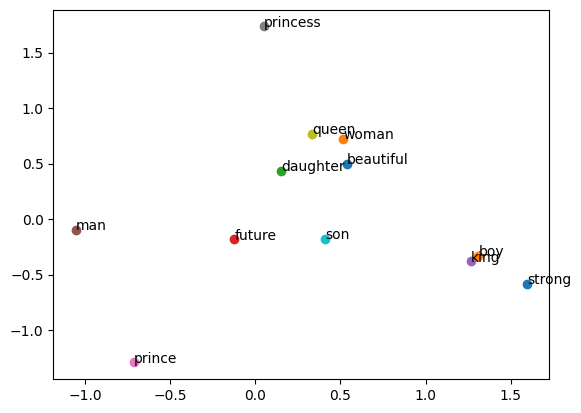

In [31]:
import matplotlib.pyplot as plt

for word in all_words:
  coordinates = word_embedding[word]
  plt.scatter(coordinates[0],coordinates[1])
  plt.annotate(word,(coordinates[0],coordinates[1]))